In [0]:
#importing required libraries
import numpy as np
import cv2
import random as rd
import math
import os
import matplotlib.pyplot as plt
import scipy.signal
import time

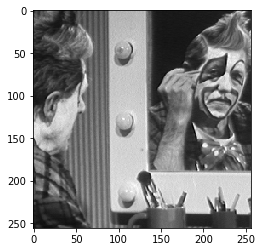

In [0]:
#converting the images into grayscale images and plotting the image:
image_data=cv2.imread('clown.tif')
gray_image = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray', vmin=np.amin(gray_image), vmax=np.amax(gray_image))

In [0]:
#vertical and horizontal sobel filters:
ky=[[1,0,-1],[2,0,-2],[1,0,-1]]
kx=[[1,2,1],[0,0,0],[-1,-2,-1]]

In [0]:
#padding function:
def padding(Input,kernel):
  pad=np.zeros((Input.shape[0]+kernel.shape[0]-1,Input.shape[1]+kernel.shape[1]-1))
 
  for i in range(kernel.shape[0],Input.shape[0]+kernel.shape[0]-1):
    for j in range(kernel.shape[1],Input.shape[1]+kernel.shape[1]-1):
      pad[i][j]=Input[i-kernel.shape[0]][j-kernel.shape[1]]
  
  ans=pad
  return ans


In [0]:
#convolution function 
def my_conv2(Input,kernel):
  Conv=list()
  kernel=np.rot90(kernel,2)
  Input=padding(Input,kernel)
  for i in range(0,Input.shape[0]-kernel.shape[0]+1):
    r=list()
    S=0
    for j in range(0,Input.shape[1]-kernel.shape[1]+1): 
      S=np.sum(np.multiply(Input[i:i+kernel.shape[0],j:j+kernel.shape[1]],kernel))
      r.append(S)
    Conv.append(r)
  return Conv

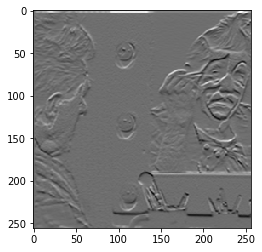

In [0]:
#convolution with horizontal sobel filter:
output3h=my_conv2(gray_image,kx)
plt.imshow(output3h, cmap='gray', vmin=np.amin(output3h), vmax=np.amax(output3h))

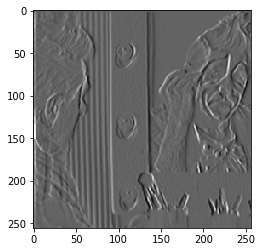

In [0]:
#convolution with vertical sobel filter:
output3v=my_conv2(gray_image,ky)
plt.imshow(output3v, cmap='gray', vmin=np.amin(output3v), vmax=np.amax(output3v))

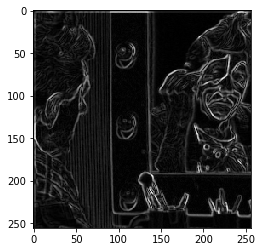

In [0]:
#convolution according to assignment defition of G=|Gx|+|Gy|
output3h=np.array(output3h)
output3v=np.array(output3v)
output3=np.add(abs(output3h),abs(output3v))
plt.imshow(output3, cmap='gray', vmin=np.amin(output3), vmax=np.amax(output3))

time taken for execution in seconds:
1.0258541107177734
Output of my_conv2 function:


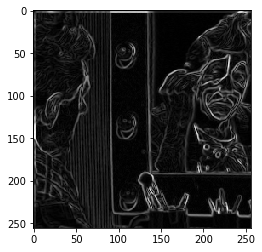

time taken for execution in seconds:
0.024585962295532227
Output of scipy convolution function:


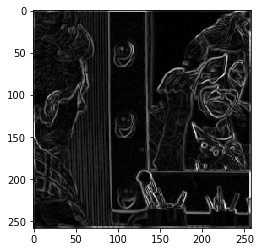

In [0]:
#convolution according to slides defition of G:G=np.sqrt(Gx^2+Gy^2):
Time1=time.time()
output3h=my_conv2(gray_image,kx)
output3v=my_conv2(gray_image,ky)
G=np.sqrt(np.add(np.multiply(output3h,output3h),np.multiply(output3v,output3v)))
Time2=time.time()
print("time taken for execution in seconds:")
print(Time2-Time1)
print("Output of my_conv2 function:")
plt.imshow(G, cmap='gray', vmin=np.amin(G), vmax=np.amax(G))
plt.show()
#convolution using scipy inbuilt function:
Time1=time.time()
scipy_output3h=scipy.signal.convolve2d(gray_image,kx)
scipy_output3v=scipy.signal.convolve2d(gray_image,ky)
scipy_output31=np.sqrt(np.add(np.multiply(scipy_output3h,scipy_output3h),np.multiply(scipy_output3v,scipy_output3v)))
Time2=time.time()
print("time taken for execution in seconds:")
print(Time2-Time1)
print("Output of scipy convolution function:")
plt.imshow(scipy_output31, cmap='gray', vmin=np.amin(scipy_output31), vmax=np.amax(scipy_output31))

Laplacian kernel:
Time taken for the execution in seconds:
0.44951295852661133
output of my_conv2 function:


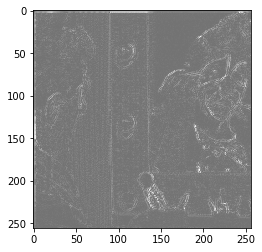

Time taken for execution in seconds:
0.004683494567871094
output of scipy convolution function:


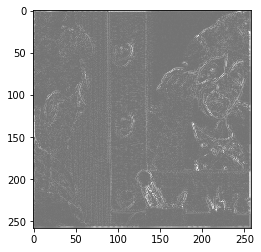

In [0]:
#convolution with laplacian filter:
print("Laplacian kernel:")

laplacian_kernel=[[0,-1,0],[-1,4,-1],[0,-1,0]]
Time1=time.time()
output3b=my_conv2(gray_image,laplacian_kernel)
Time2=time.time()
print("Time taken for the execution in seconds:")
print(Time2-Time1)
print("output of my_conv2 function:")
plt.imshow(abs(np.array(output3b)), cmap='gray', vmin=np.amin(output3b), vmax=np.amax(output3b))
plt.show()

Time1=time.time()
scipy_output3b=scipy.signal.convolve2d(gray_image,laplacian_kernel)
Time2=time.time()
print("Time taken for execution in seconds:")
print(Time2-Time1)
print("output of scipy convolution function:")
plt.imshow(abs(scipy_output3b), cmap='gray', vmin=np.amin(scipy_output3b), vmax=np.amax(scipy_output3b))